#Importing the Necessary Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install scikit-learn scikit-optimize
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from skopt import BayesSearchCV
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout
sns.set()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.7 MB/s eta 0:00:00


#Loading the Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Dataset/diabetes.csv')

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


#Exploratory Data Analysis(EDA) for Movie Reviews Classification

In [5]:
df.shape

(2000, 9)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [6]:
df['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

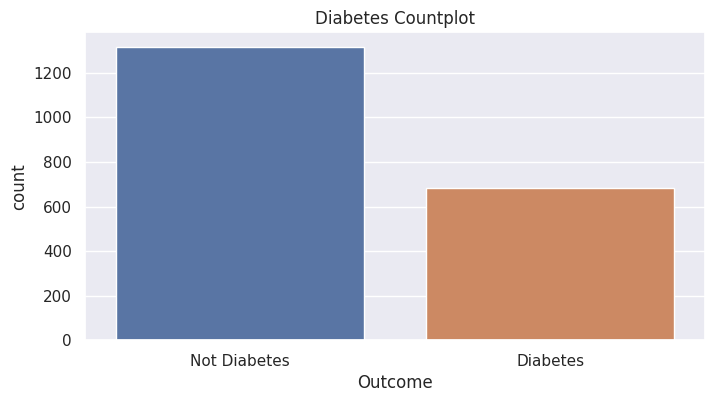

In [11]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Countplot')
plt.xticks([0, 1], ['Not Diabetes', 'Diabetes'])
plt.show()

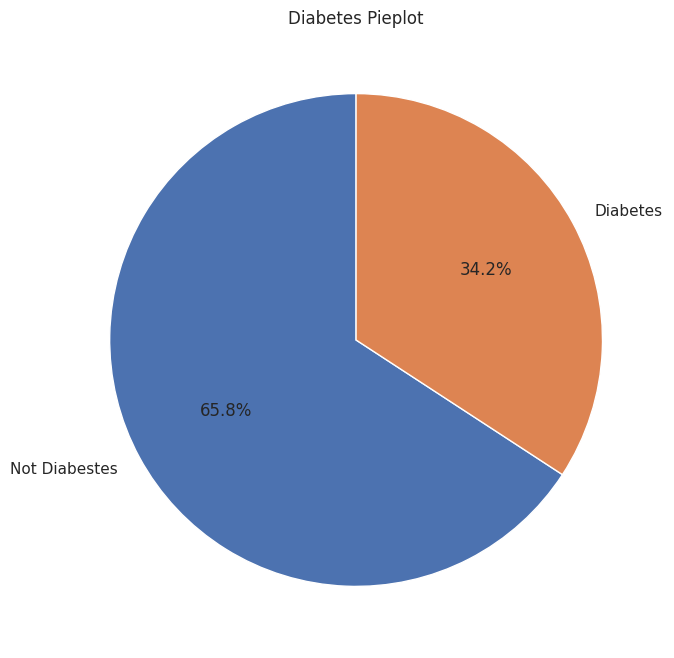

In [10]:
plt.figure(figsize=(8, 8))
df['Outcome'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.0] * len(df['Outcome'].unique()),
    labels=['Not Diabestes', 'Diabetes']
)
plt.title('Diabetes Pieplot')
plt.axis('off')
plt.show()

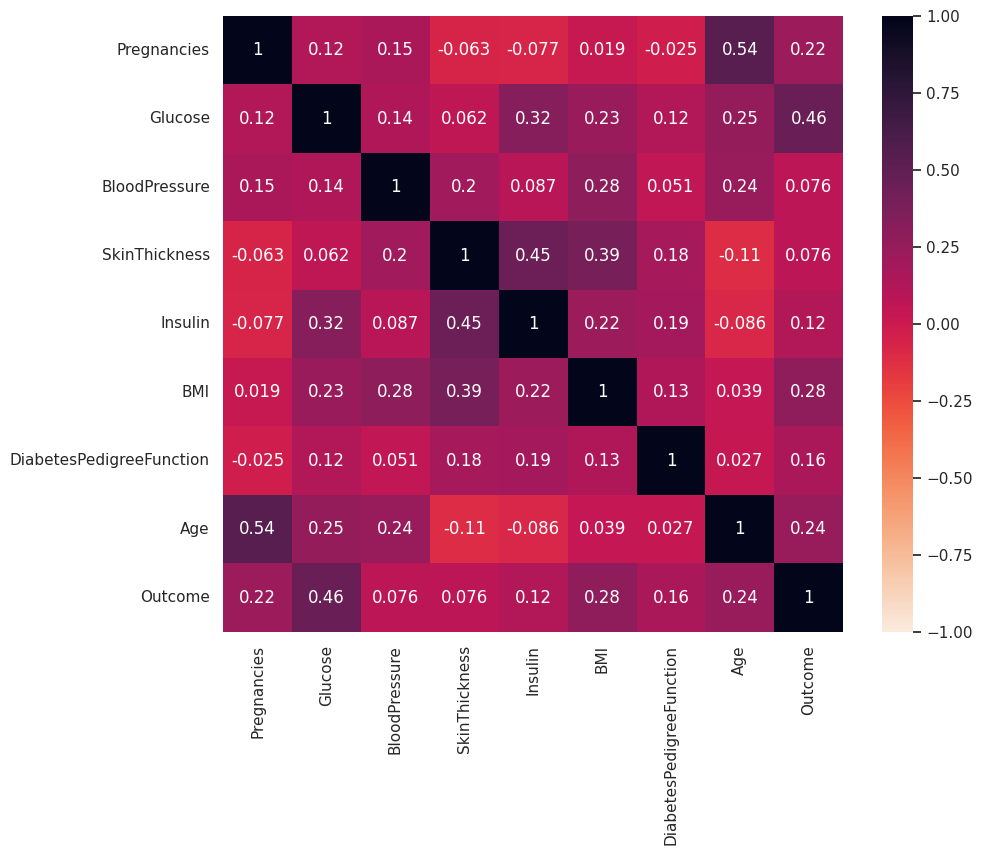

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(),vmin=-1, vmax=1,annot=True,cmap="rocket_r", ax=ax)
plt.show()

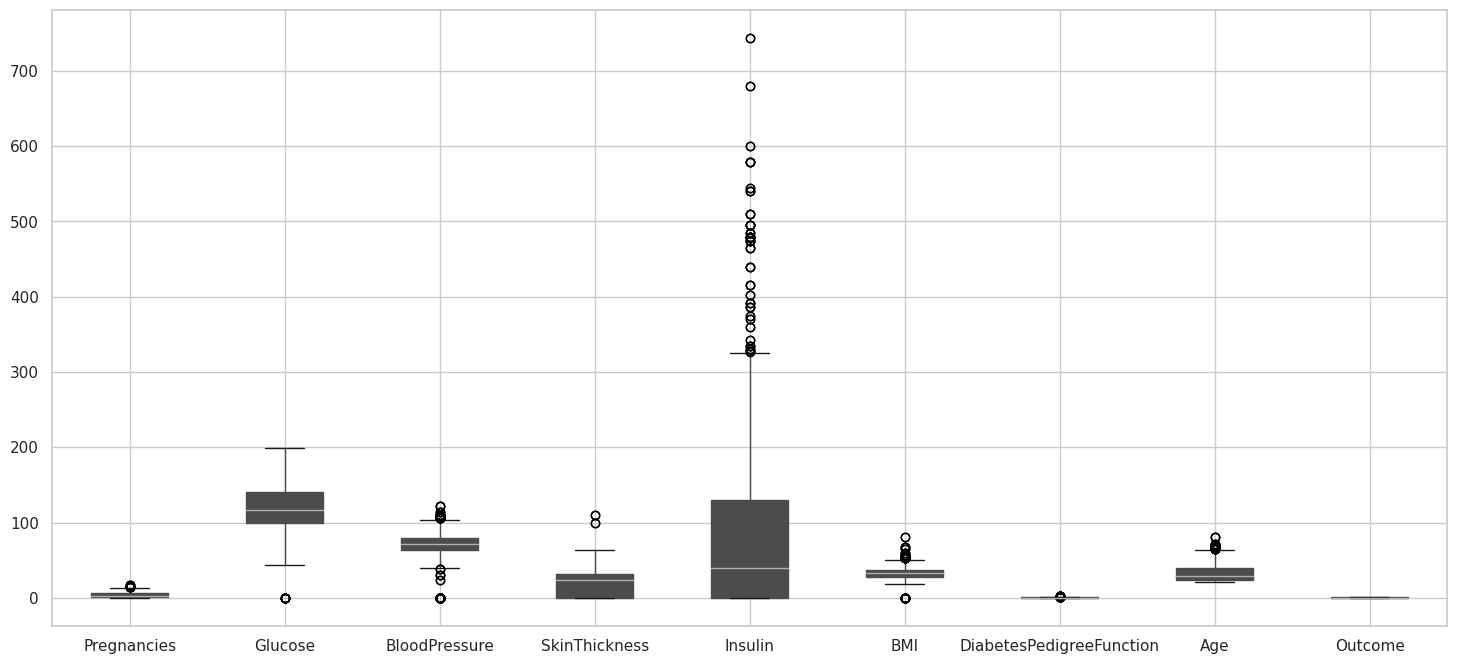

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(18,8))
boxplot = df.boxplot(patch_artist=True, ax=ax)
plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df['Outcome'].value_counts()

0    1136
1     516
Name: Outcome, dtype: int64

#Dataset Preparation

##Feature Scaling Using Min-Max Scaling

In [ ]:
cols = df.columns

In [ ]:
ms=MinMaxScaler()
df=ms.fit_transform(df)
df=pd.DataFrame(df,columns=cols)
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.153846,0.610390,0.34375,0.583333,0.000000,0.473846,0.044025,0.604651,1.0
1,0.000000,0.259740,0.65625,0.516667,0.384615,0.615385,0.139263,0.046512,0.0
2,0.000000,0.590909,0.43750,0.700000,0.769231,0.741538,0.257862,0.069767,1.0
3,0.000000,0.837662,0.59375,0.533333,0.815385,0.870769,0.971249,0.860465,0.0
4,0.307692,0.357143,0.50000,0.283333,0.000000,0.227692,0.194070,0.162791,0.0


##Splitting Features and Target


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

##Splitting the Diabetes Dataset into Training and Testing Sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#Machine Learning Models

##Hyperparameter Optimization and Model Evaluation for Logistic Regression

In [ ]:
def objective(params):
    lr = LogisticRegression(C=params['C'], max_iter=params['max_iter'])
    score = cross_val_score(lr, X_train, Y_train, cv=5, scoring='accuracy').mean()

    return -score

search_space = {
    'C': (1e-6, 1e+6, 'log-uniform'),
    'max_iter': (200, 1000)
}


bayes_search = BayesSearchCV(
    LogisticRegression(),
    search_space,
    n_iter=50,
    cv=5,
    n_jobs=-1
)

bayes_search.fit(X_train, Y_train)

BayesSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
              search_spaces={'C': (1e-06, 1000000.0, 'log-uniform'),
                             'max_iter': (200, 1000)})

In [ ]:
print("Best hyperparameters:", bayes_search.best_params_)

best_lr_model = bayes_search.best_estimator_

y_pred = best_lr_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred) * 100
print("Accuracy: {:.2f}%".format(accuracy))

report = classification_report(Y_test, y_pred)
print("Classification Report:\n", report)

Best hyperparameters: OrderedDict([('C', 3.165642247747495), ('max_iter', 1000)])
Accuracy: 78.69%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       273
         1.0       0.75      0.55      0.64       140

    accuracy                           0.79       413
   macro avg       0.78      0.73      0.74       413
weighted avg       0.78      0.79      0.78       413



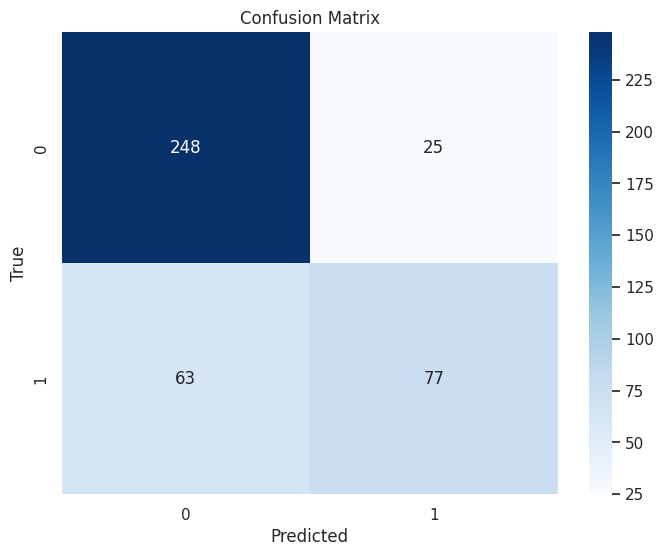

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
scores = cross_val_score(best_lr_model, X_train,Y_train, cv=10)

print("Accuracy: {:.2f}%".format(accuracy_score(Y_test,y_pred)*100))
print ("Cross-validated scores:", scores)

Accuracy: 78.69%
Cross-validated scores: [0.80645161 0.77419355 0.75806452 0.79032258 0.73387097 0.82258065
 0.83870968 0.83064516 0.7983871  0.78861789]


##Hyperparameter Optimization and Model Evaluation for Support Vector Machine (SVM)

In [ ]:
def objective(params):
    svm = SVC(C=params['C'], kernel='linear')
    score = cross_val_score(svm, X_train, Y_train, cv=5, scoring='accuracy').mean()
    return -score

search_space = {
    'C': (1e-6, 1e+6, 'log-uniform'),
}

bayes_search = BayesSearchCV(
    SVC(),
    search_space,
    n_iter=50,
    cv=5,
    n_jobs=-1
)

bayes_search.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BayesSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
              search_spaces={'C': (1e-06, 1000000.0, 'log-uniform')})

In [ ]:
print("Best hyperparameters:", bayes_search.best_params_)

best_svm_model = bayes_search.best_estimator_

y_pred2 = best_svm_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred2) * 100
print("Accuracy: {:.2f}%".format(accuracy))

report = classification_report(Y_test, y_pred2)
print("Classification Report:\n", report)

Best hyperparameters: OrderedDict([('C', 1772.6156369057494)])
Accuracy: 97.09%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       273
         1.0       0.99      0.92      0.96       140

    accuracy                           0.97       413
   macro avg       0.98      0.96      0.97       413
weighted avg       0.97      0.97      0.97       413



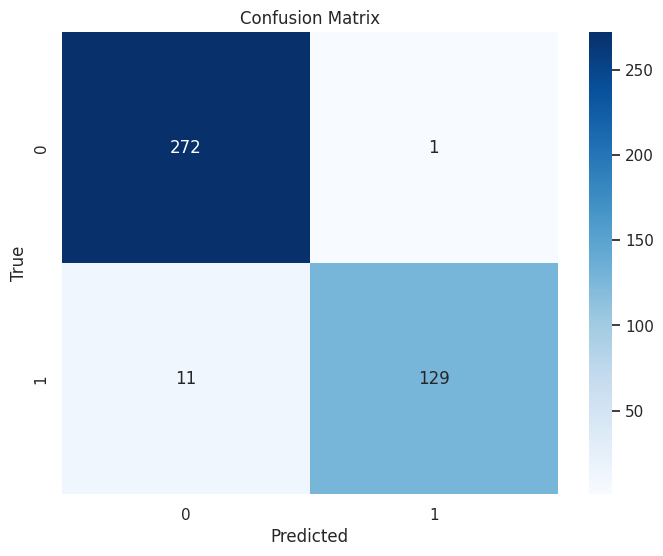

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
scores = cross_val_score(best_svm_model, X_train,Y_train, cv=10)

print("Accuracy: {:.2f}%".format(accuracy_score(Y_test,y_pred2)*100))
print ("Cross-validated scores:", scores)

Accuracy: 97.09%
Cross-validated scores: [0.91935484 0.91935484 0.92741935 0.94354839 0.95967742 0.93548387
 0.96774194 0.96774194 0.96774194 0.94308943]


##Hyperparameter Optimization and Model Evaluation for Random Forest

In [ ]:
def objective(params):
    rf = RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        random_state=42,
        class_weight='balanced'
    )

    score = cross_val_score(rf, X_train, Y_train, cv=5, scoring='accuracy').mean()

    return -score

search_space = {
    'n_estimators': (300, 1000),
    'max_depth': (5, 20),
}

bayes_search = BayesSearchCV(
    RandomForestClassifier(),
    search_space,
    n_iter=50,
    cv=5,
    n_jobs=-1
)

bayes_search.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist

BayesSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
              search_spaces={'max_depth': (5, 20), 'n_estimators': (300, 1000)})

In [ ]:
print("Best hyperparameters:", bayes_search.best_params_)

best_rf_model = bayes_search.best_estimator_

y_pred3 = best_rf_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred3) * 100
print("Accuracy: {:.2f}%".format(accuracy))

report = classification_report(Y_test, y_pred3)
print("Classification Report:\n", report)

Best hyperparameters: OrderedDict([('max_depth', 20), ('n_estimators', 300)])
Accuracy: 98.79%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       273
         1.0       1.00      0.96      0.98       140

    accuracy                           0.99       413
   macro avg       0.99      0.98      0.99       413
weighted avg       0.99      0.99      0.99       413



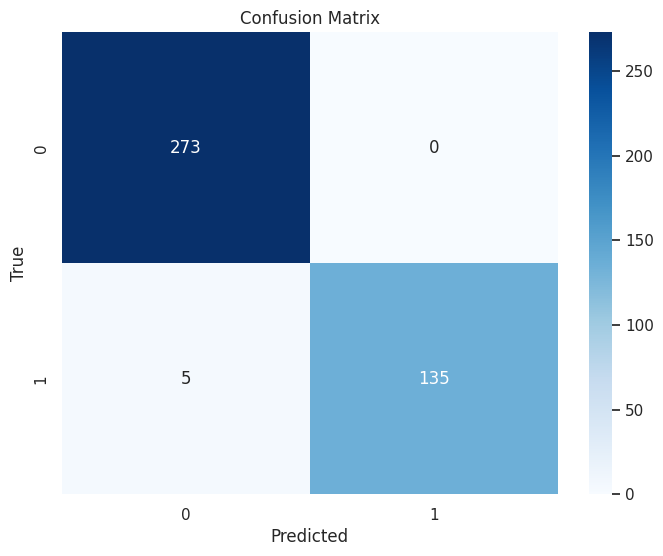

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred3)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
scores = cross_val_score(best_rf_model, X_train,Y_train, cv=10)

accuracy = accuracy_score(Y_test, y_pred3) * 100
print("Accuracy: {:.2f}%".format(accuracy))

print ("Cross-validated scores:", scores)

Accuracy: 98.79%
Cross-validated scores: [0.93548387 0.9516129  0.9516129  0.96774194 0.94354839 0.9516129
 0.98387097 0.98387097 0.98387097 0.97560976]


In [ ]:
joblib.dump(best_rf_model, 'Diabetes_RF.pkl')
#model = joblib.load('Diabetes_RF.pkl')

['Diabetes_RF.pkl']

##Hyperparameter Optimization and Model Evaluation for Gradient Boosting

In [ ]:
def objective(params):
    gbc = GradientBoostingClassifier(
        n_estimators=params['n_estimators'],
        max_features=params['max_features'],
        max_depth=params['max_depth'],
        random_state=42,
        verbose=1
    )

    score = cross_val_score(gbc, X_train, Y_train, cv=5, scoring='accuracy').mean()
    return -score

search_space = {
    'n_estimators': (200, 500),
    'max_features': (1, X_train.shape[1]),
    'max_depth': (5, 20),
}

bayes_search = BayesSearchCV(
    GradientBoostingClassifier(),
    search_space,
    n_iter=50,
    cv=5,
    n_jobs=-1
)

bayes_search.fit(X_train, Y_train)

BayesSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
              search_spaces={'max_depth': (5, 20), 'max_features': (1, 8),
                             'n_estimators': (200, 500)})

In [ ]:
print("Best hyperparameters:", bayes_search.best_params_)

best_gbc_model = bayes_search.best_estimator_

y_pred4 = best_gbc_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred4) * 100
print("\nAccuracy: {:.2f}%".format(accuracy))

report = classification_report(Y_test, y_pred4)
print("Classification Report:\n", report)

Best hyperparameters: OrderedDict([('max_depth', 17), ('max_features', 1), ('n_estimators', 492)])

Accuracy: 98.79%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       273
         1.0       1.00      0.96      0.98       140

    accuracy                           0.99       413
   macro avg       0.99      0.98      0.99       413
weighted avg       0.99      0.99      0.99       413



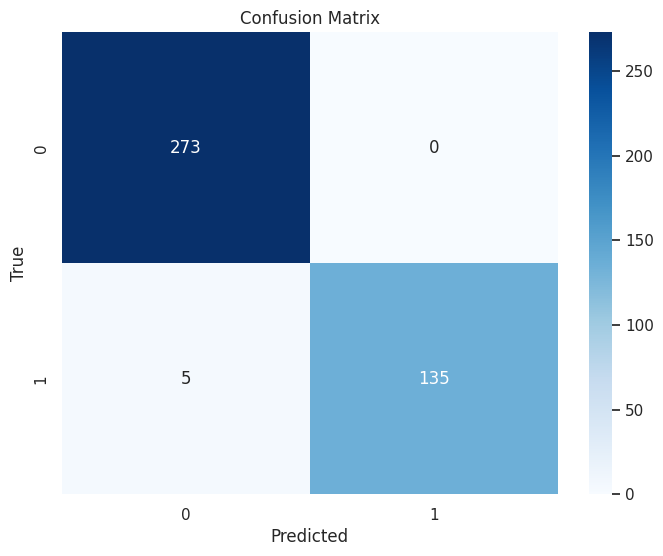

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred4)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
scores = cross_val_score(best_gbc_model, X_train,Y_train, cv=10)

accuracy = accuracy_score(Y_test, y_pred4) * 100
print("Accuracy: {:.2f}%".format(accuracy))

print ("Cross-validated scores:", scores)

Accuracy: 98.79%
Cross-validated scores: [0.96774194 0.94354839 0.9516129  0.95967742 0.9516129  0.9516129
 0.98387097 0.95967742 0.98387097 0.97560976]


In [ ]:
joblib.dump(best_gbc_model, 'Diabetes_Gradient_Boosting.pkl')
#model = joblib.load('Diabetes_Gradient_Boosting.pkl')

['Diabetes_Gradient_Boosting.pkl']

##Ensemble Modeling with AdaBoost and RandomForest

In [ ]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=14, random_state=42)
abc= AdaBoostClassifier(estimator=rfc, learning_rate=0.2, n_estimators=100)

abc.fit(X_train, Y_train)
y_pred5= abc.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred5) * 100
print("Accuracy: {:.2f}%".format(accuracy))

report = classification_report(Y_test, y_pred5)
print("Classification Report:\n", report)

Accuracy: 98.06%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       273
         1.0       1.00      0.94      0.97       140

    accuracy                           0.98       413
   macro avg       0.99      0.97      0.98       413
weighted avg       0.98      0.98      0.98       413



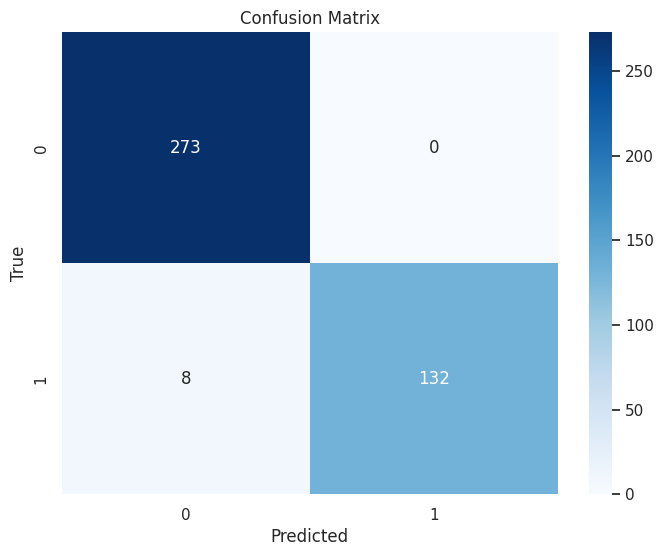

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred5)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
scores = cross_val_score(abc, X_train,Y_train, cv=10)

accuracy = accuracy_score(Y_test, y_pred5) * 100
print("Accuracy: {:.2f}%".format(accuracy))

print ("Cross-validated scores:", scores)

Accuracy: 98.06%
Cross-validated scores: [0.95967742 0.9516129  0.9516129  0.96774194 0.94354839 0.96774194
 0.99193548 0.97580645 0.98387097 0.97560976]


In [ ]:
joblib.dump(abc, 'Diabetes_Adaboost.pkl')
#model = joblib.load('Diabetes_Adaboost.pkl')

['Diabetes_Adaboost.pkl']

##Ensemble Modeling with Voting Classifier

In [ ]:
rfc= RandomForestClassifier(n_estimators=514, max_depth=11, random_state=42)
svc = SVC(probability=True)
gbc = GradientBoostingClassifier( n_estimators= 499, max_features= 3, max_depth= 20, random_state= 42)

ec=VotingClassifier(estimators=[('Random Forest', rfc),('Support Vector Machine',svc),('Gradient Boosting', gbc)], voting='soft', weights=[1,1,1])
ec.fit(X_train,Y_train)
y_pred6 = ec.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred6) * 100
print("Accuracy: {:.2f}%".format(accuracy))

report = classification_report(Y_test, y_pred6)
print("Classification Report:\n", report)

Accuracy: 98.79%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       273
         1.0       1.00      0.96      0.98       140

    accuracy                           0.99       413
   macro avg       0.99      0.98      0.99       413
weighted avg       0.99      0.99      0.99       413



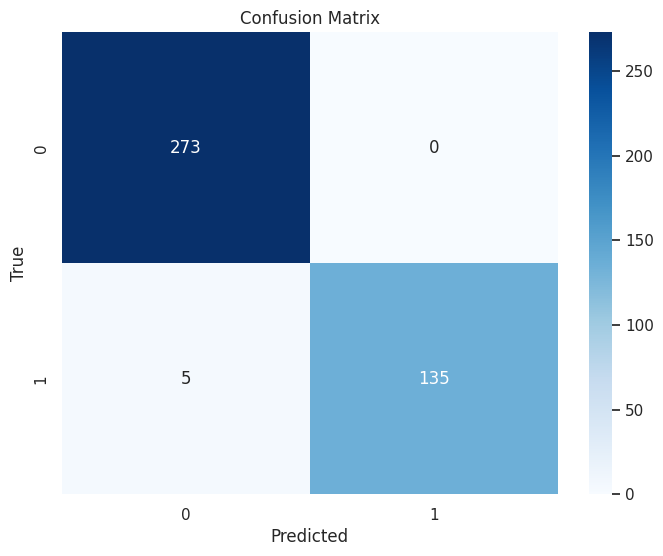

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred6)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
scores = cross_val_score(ec, X_train,Y_train, cv=10)

accuracy = accuracy_score(Y_test, y_pred6) * 100
print("Accuracy: {:.2f}%".format(accuracy))

print ("Cross-validated scores:", scores)

Accuracy: 98.79%
Cross-validated scores: [0.9516129  0.9516129  0.95967742 0.96774194 0.9516129  0.96774194
 0.99193548 0.98387097 0.97580645 0.97560976]


##Model Comparison for Diabetes Prediction

In [ ]:
Model_Comparison = pd.DataFrame({'Logistic Regression': [accuracy_score(Y_test,y_pred)*100,f1_score(Y_test,y_pred,average='macro')*100,recall_score(Y_test, y_pred,average='micro')*100,precision_score(Y_test, y_pred,average='micro')*100],
                            'SVM':[accuracy_score(Y_test,y_pred2)*100,f1_score(Y_test,y_pred2,average='macro')*100,recall_score(Y_test, y_pred2,average='micro')*100,precision_score(Y_test, y_pred2,average='micro')*100],
                           'Random Forest':[accuracy_score(Y_test,y_pred3)*100,f1_score(Y_test,y_pred3,average='macro')*100,recall_score(Y_test, y_pred3,average='micro')*100,precision_score(Y_test, y_pred3,average='micro')*100],
                           'GradientBoosting':[accuracy_score(Y_test,y_pred4)*100,f1_score(Y_test,y_pred4,average='macro')*100,recall_score(Y_test, y_pred4,average='micro')*100,precision_score(Y_test, y_pred4,average='micro')*100],
                          'Adaboost':[accuracy_score(Y_test,y_pred5)*100,f1_score(Y_test,y_pred5,average='macro')*100,recall_score(Y_test, y_pred5,average='micro')*100,precision_score(Y_test, y_pred5,average='micro')*100],
                           'Ensembled':[accuracy_score(Y_test,y_pred6)*100,f1_score(Y_test,y_pred6,average='macro')*100,recall_score(Y_test, y_pred6,average='micro')*100,precision_score(Y_test, y_pred6,average='micro')*100],

})

In [ ]:
print ('Model Comparison')
Model_Comparison.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Model_Comparison.head()

Model Comparison


,Logistic Regression,SVM,Random Forest,GradientBoosting,Adaboost,Ensembled
Accuracy,78.692494,97.094431,98.789346,98.789346,98.062954,98.789346
F1_score,74.283935,96.698641,98.637189,98.637189,97.807390,98.637189
Recall,78.692494,97.094431,98.789346,98.789346,98.062954,98.789346
Precision,78.692494,97.094431,98.789346,98.789346,98.062954,98.789346


#Deep Learning Models

##Deep Neural Network(DNN) Model Training

In [ ]:
model = Sequential()

model.add(Dense(128, input_shape=(8,), activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

history= model.fit(X_train, Y_train, epochs=300, batch_size=16, validation_split=0.1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               1152      
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 128)               8320      
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 256)              

##Evaluation of Deep Neural Network Model

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20095454156398773
Test accuracy: 0.9685230255126953


In [ ]:
y_pred= ((model.predict(X_test))> 0.5).astype(int)

report = classification_report(Y_test, y_pred)
print("Classification Report:\n", report)

13/13 [==============================] - 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       273
         1.0       0.96      0.94      0.95       140

    accuracy                           0.97       413
   macro avg       0.97      0.96      0.96       413
weighted avg       0.97      0.97      0.97       413



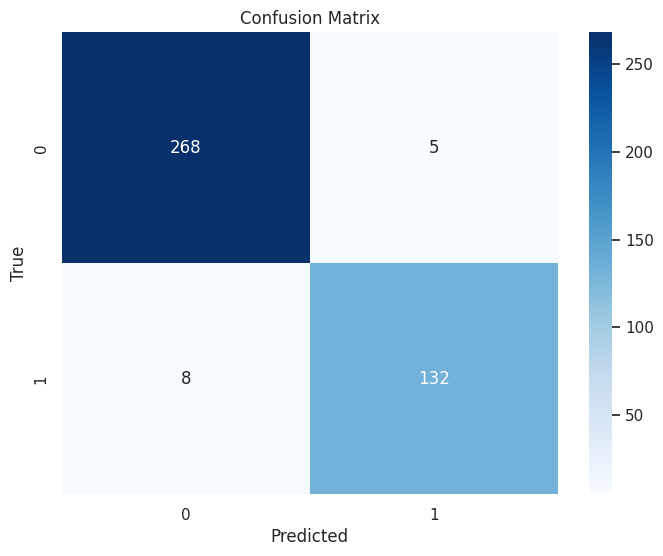

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

##Training and Validation Metrics of Deep Neural Network Model

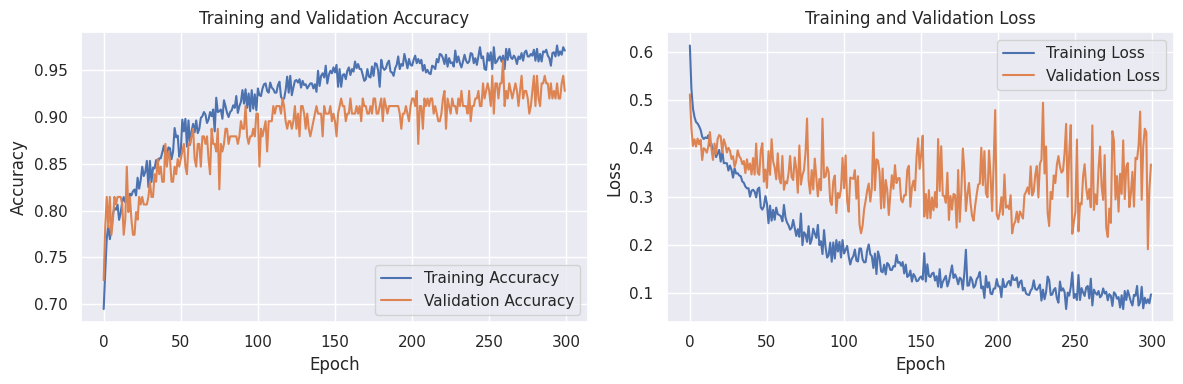

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

##Model Save

In [ ]:
model.save('/content/drive/MyDrive/Colab_Notebooks/DL Model/Diabetes.h5')
#model = load_model('/content/drive/MyDrive/Colab_Notebooks/DL Model/Diabetes.h5')